## 1.Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE


## 2. Load your wine quality dataset using Pandas

In [2]:
data = pd.read_csv('winequality-red.csv')

## 3.Display Top 5 Rows of The Dataset

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 4.Check Last 5 Rows of The Dataset

In [4]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


## 5.Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [5]:
print("Number of Rows:", data.shape[0])
print("Number of Columns:", data.shape[1])

Number of Rows: 1599
Number of Columns: 12


## 6.Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## 7.Check Null Values In The Dataset

In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 8.Get Overall Statistics About The Dataset

In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 9.Quality Vs. Fixed Acidity

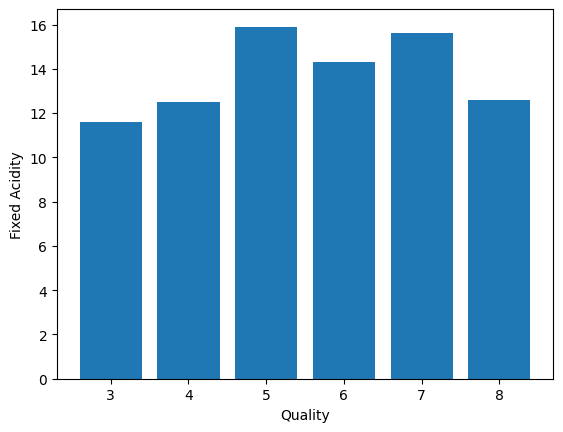

In [9]:
plt.bar(data['quality'], data['fixed acidity'])
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.show()

## 10.Volatile acidity Vs. Quality

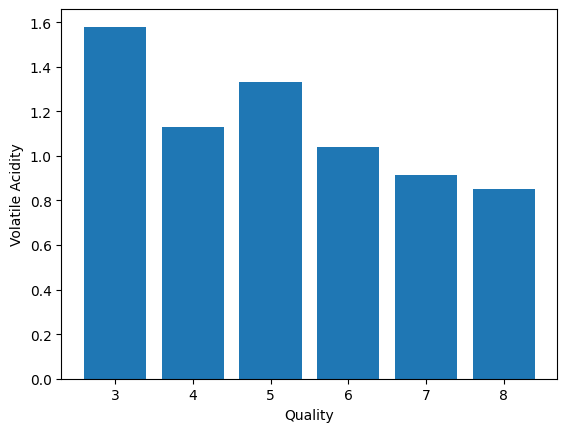

In [10]:
plt.bar(data['quality'], data['volatile acidity'])
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.show()

## 11.Residual sugar Vs. Quality

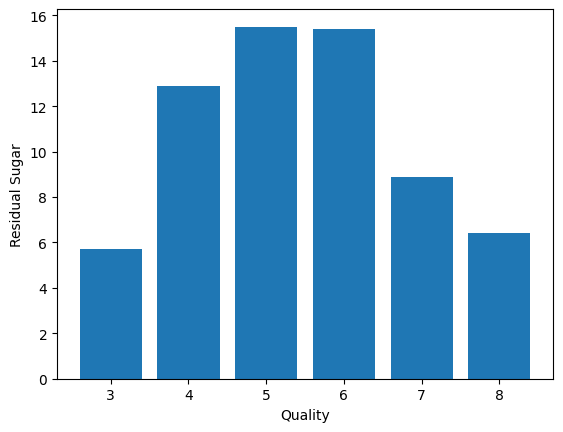

In [11]:
plt.bar(data['quality'], data['residual sugar'])
plt.xlabel('Quality')
plt.ylabel('Residual Sugar')
plt.show()


## 12.Chlorides Vs. Quality

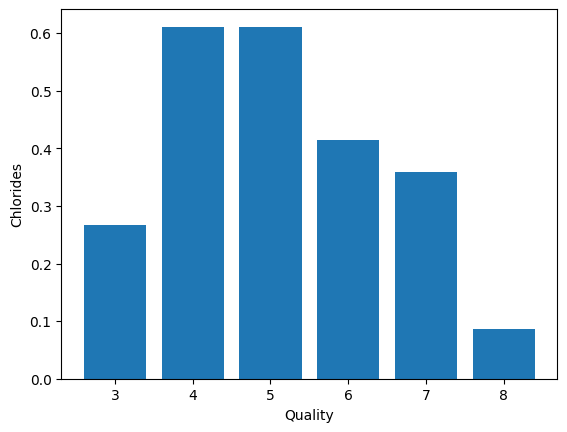

In [12]:
plt.bar(data['quality'], data['chlorides'])
plt.xlabel('Quality')
plt.ylabel('Chlorides')
plt.show()

## 13.Total sulfur dioxide Vs. Quality

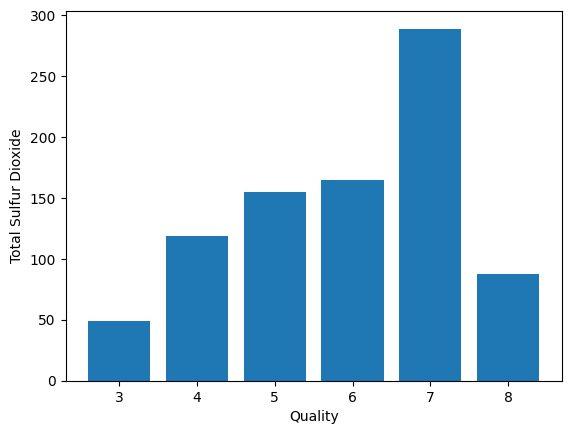

In [13]:
plt.bar(data['quality'], data['total sulfur dioxide'])
plt.xlabel('Quality')
plt.ylabel('Total Sulfur Dioxide')
plt.show()

## 14.Alcohol Vs. Quality

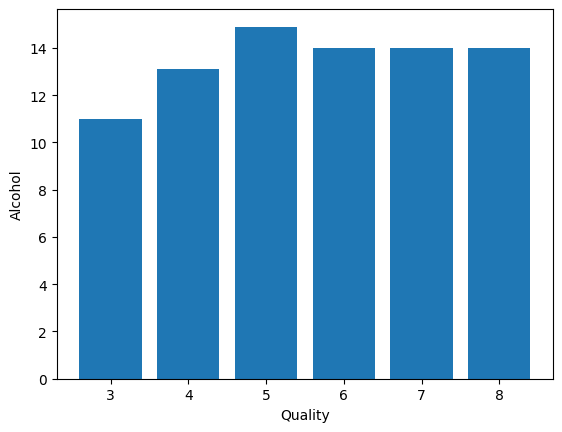

In [14]:
plt.bar(data['quality'], data['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()


## 15.Correlation Matrix

<Axes: >

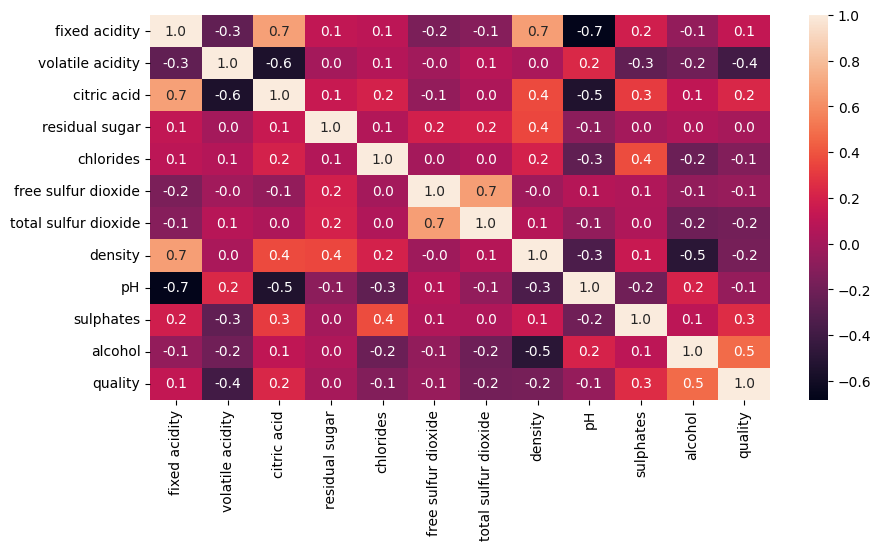

In [15]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True, fmt='0.1f')

## 16.Binarization of target variable

In [16]:
data['quality'] = [1 if x >= 7 else 0 for x in data['quality']]

## 17.Handling Imbalanced Dataset

In [17]:
X = data.drop('quality', axis=1)
y = data['quality']
X_res, y_res = SMOTE().fit_resample(X, y)

## 18.Store Feature Matrix In X And Response (Target) In Vector y

In [18]:

X = data.drop('quality', axis=1)
y = data['quality']


## 19.Splitting The Dataset Into The Training Set And Test Set


In [19]:

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

## 20.Feature Scaling


In [20]:
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

## 21.Applying PCA

In [21]:
pca = PCA(n_components=0.90)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## 22.Create and train a linear regression model

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## 23.Make predictions on the test set

In [23]:

y_pred = model.predict(X_test)

## 24.Evaluate the model's performance

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [25]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.13590541245961824
R-squared: 0.4548792230153539
